![University of Tehran](./img/UT.png)
#   <font color='red'><center>AI CA 5 - Phase 2<center></font> 
## <center>Dr. Fadaei<center>
### <center>Daniyal Maroufi<center>
### <center>810098039<center>

# Aim

This assignment aims to use the Tensorflow library with the Keras API to recognize handwritten alphabets of this Kaggle dataset.

# Dataset Description

This dataset consists of letters in 26 classes, and each image is in gray style. All the samples are saved into a csv file.

![Dataset](./img/letter_samples.jpg)

# Part 1 - Exploratory Data Analysis

In [20]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
                                                                    
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data.csv
/kaggle/input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data/A_Z Handwritten Data.csv


In [21]:
from time import time
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import metrics
from sklearn.model_selection import train_test_split


In [22]:
data = pd.read_csv('/kaggle/input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data.csv')

In [23]:
y_data = data['0']
del data['0']
x_data = data
del data


In [6]:
x_data

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372446,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372447,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372448,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


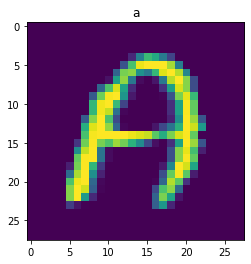

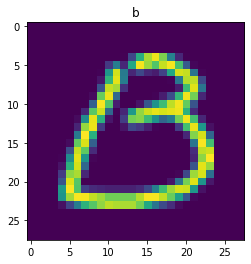

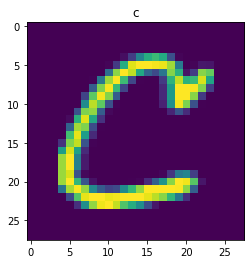

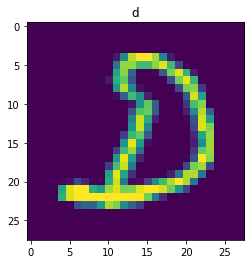

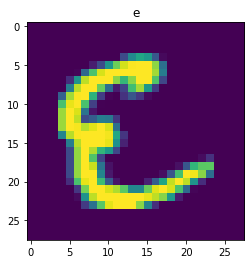

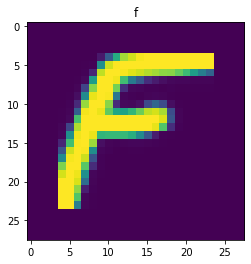

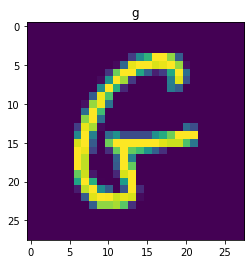

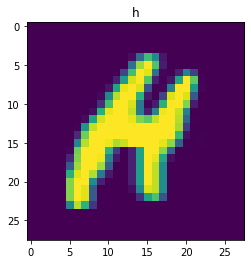

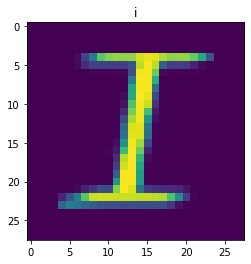

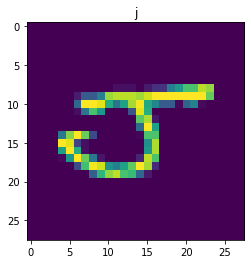

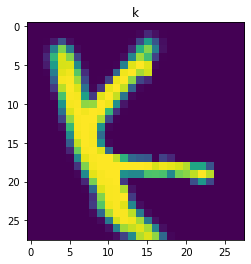

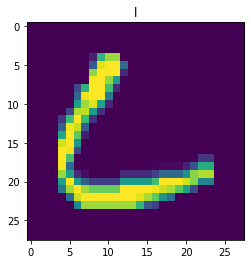

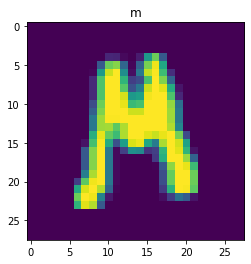

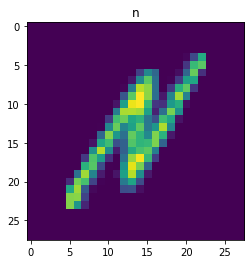

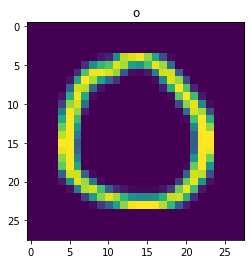

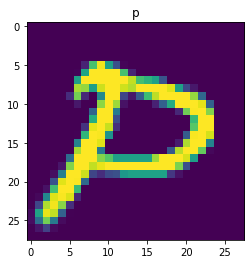

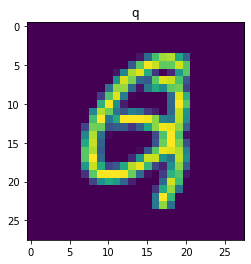

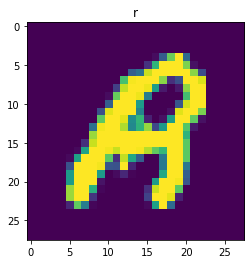

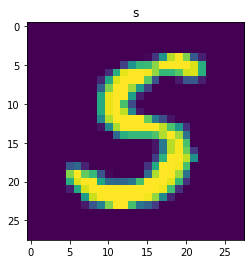

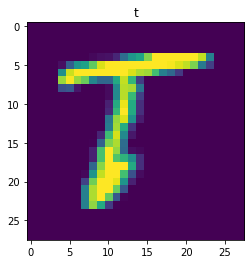

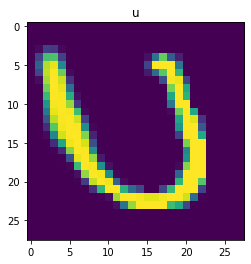

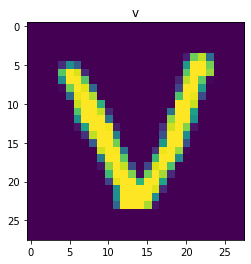

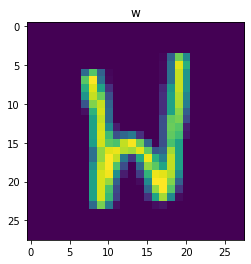

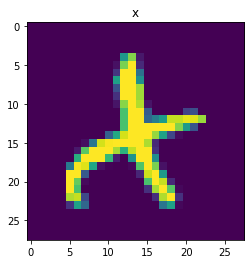

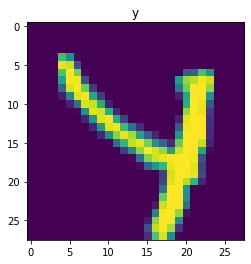

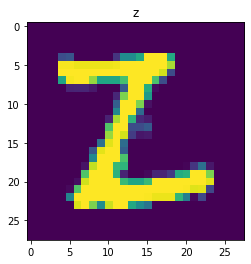

In [7]:
alphabets='abcdefghijklmnopqrstuvwxyz'
for i in range(26):
    plt.imshow(x_data[y_data==i].iloc[1][:].values.reshape((28,28)))
    plt.title(alphabets[i])
    plt.show()

In [24]:
labels=set(y_data)

In [9]:
print('The number of the data is',y_data.shape[0])
print('The number of classes in the dataset is',len(labels))

The number of the data is 372450
The number of classes in the dataset is 26


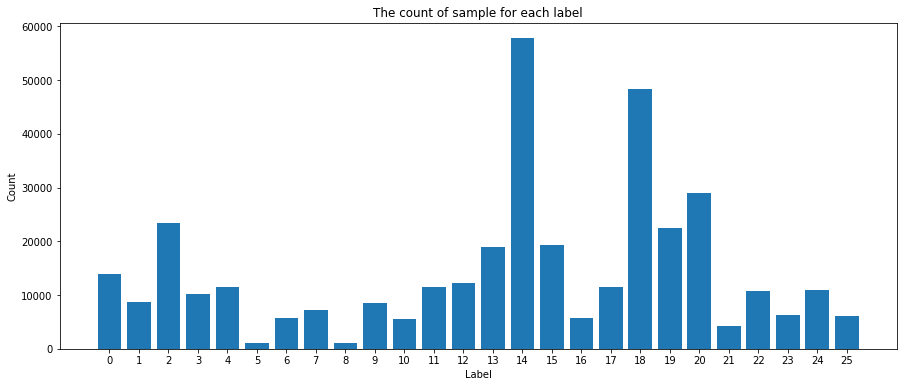

In [10]:
plt.figure(figsize=(15,6))
values_counts=y_data.value_counts()
values_counts=values_counts[values_counts.argsort()]
plt.bar(values_counts.index,values_counts.values)
plt.xticks([i for i in range(26)],[str(i) for i in range(26)])
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('The count of sample for each label')
plt.show()


## Encoding

In machine learning, we work with numbers, not texts, So to perform machine learning algorithms, we need to change categorical features to numerical features. There are two approaches to encoding categorical features.

Approach 1: Label Encoding

Label encoding is simply converting each value in a column to a number. For example, the artist_name column contains many different values. We can select a number for each artist_name and map the categorical values to numeric values.

Approach 2: One Hot Encoding

Label encoding has the advantage that it is straightforward, but it has the disadvantage that the algorithms can misinterpret the numeric values. For example, the value of zero is less than four but does that correspond to the data set in real life? Does an artist have 4X more weight than another one?

A common alternative approach is called one-hot encoding (but it also goes by several different names shown below). Despite the other terms, the basic strategy is to convert each category value into a new column and assigns a 1 or 0 (True/False) value to the column. This benefits from not weighing a value improperly but has the downside of adding more columns to the data set ([Source](https://pbpython.com/categorical-encoding.html)).

In [25]:
y_data=tf.keras.utils.to_categorical(y_data,len(labels))
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)


In [26]:
del x_data
del y_data


## Part 2

In [27]:
def get_model(activation_function='relu'):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape = (28*28, 1)))
    model.add(tf.keras.layers.Dense(256, activation=activation_function))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(128, activation=activation_function))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(len(labels), activation='softmax'))
    return model


In [14]:
model=get_model()

2022-06-18 16:50:24.894113: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 26)                3354      
Total params: 237,210
Trainable params: 237,210
Non-trainable params: 0
__________________________________________________

The number of parameters can be calculated by the following equation:

$(number\, of\, neurons\, in\, previous\, layer+1)*(number\, of\, neurons\, in\, current\, layer)$

So, for this neural network, the number of parameters is:

$(784+1)*256+(256+1)*128=237210$

In [16]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), metrics=['accuracy'])


# Part 3

In [17]:
x_train = x_train/255
x_test = x_test/255

In [18]:
tic=time()
history=model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data = (x_test, y_test))
toc=time()

print('The total time to train the model was:',toc-tic)

2022-06-18 16:50:32.727601: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
9312/9312 [==============================] - 34s 4ms/step - loss: 0.7755 - accuracy: 0.7855 - val_loss: 0.3517 - val_accuracy: 0.9025
Epoch 2/10
9312/9312 [==============================] - 32s 3ms/step - loss: 0.3776 - accuracy: 0.8946 - val_loss: 0.2397 - val_accuracy: 0.9329
Epoch 3/10
9312/9312 [==============================] - 32s 3ms/step - loss: 0.2895 - accuracy: 0.9192 - val_loss: 0.1888 - val_accuracy: 0.9471
Epoch 4/10
9312/9312 [==============================] - 32s 3ms/step - loss: 0.2445 - accuracy: 0.9310 - val_loss: 0.1603 - val_accuracy: 0.9553
Epoch 5/10
9312/9312 [==============================] - 32s 3ms/step - loss: 0.2153 - accuracy: 0.9391 - val_loss: 0.1423 - val_accuracy: 0.9604
Epoch 6/10
9312/9312 [==============================] - 33s 4ms/step - loss: 0.1948 - accuracy: 0.9449 - val_loss: 0.1290 - val_accuracy: 0.9644
Epoch 7/10
9312/9312 [==============================] - 33s 4ms/step - loss: 0.1806 - accuracy: 0.9491 - val_loss: 0.1196 - val_ac

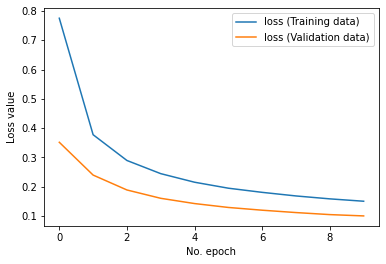

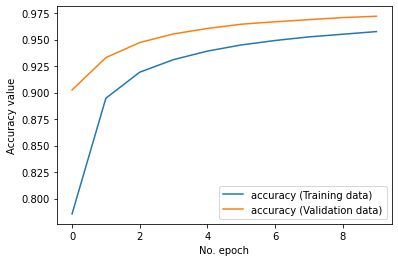

In [20]:
plt.plot(history.history['loss'], label='loss (Training data)')
plt.plot(history.history['val_loss'], label='loss (Validation data)')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="best")
plt.show()

plt.plot(history.history['accuracy'], label='accuracy (Training data)')
plt.plot(history.history['val_accuracy'], label='accuracy (Validation data)')
plt.ylabel('Accuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="best")
plt.show()

In [21]:
y_pred_train=np.argmax(model.predict(x_train),axis=1)
print(metrics.classification_report(np.argmax(y_train,axis=1), y_pred_train, digits=3))


              precision    recall  f1-score   support

           0      0.952     0.986     0.969     11104
           1      0.976     0.953     0.964      6916
           2      0.976     0.983     0.979     18698
           3      0.955     0.922     0.938      8143
           4      0.968     0.965     0.966      9252
           5      0.955     0.935     0.945       945
           6      0.954     0.936     0.945      4566
           7      0.966     0.925     0.945      5762
           8      0.983     0.897     0.938       897
           9      0.946     0.952     0.949      6803
          10      0.956     0.942     0.949      4499
          11      0.976     0.977     0.977      9243
          12      0.972     0.974     0.973      9917
          13      0.962     0.979     0.970     15229
          14      0.979     0.993     0.986     46182
          15      0.985     0.982     0.983     15438
          16      0.966     0.936     0.951      4678
          17      0.972    

In [22]:
y_pred_test=np.argmax(model.predict(x_test),axis=1)
print(metrics.classification_report(np.argmax(y_test,axis=1), y_pred_test, digits=3))

              precision    recall  f1-score   support

           0      0.948     0.985     0.966      2765
           1      0.975     0.929     0.951      1752
           2      0.972     0.983     0.977      4711
           3      0.951     0.910     0.930      1991
           4      0.965     0.963     0.964      2188
           5      0.953     0.936     0.944       218
           6      0.956     0.930     0.943      1196
           7      0.957     0.919     0.938      1456
           8      0.990     0.897     0.941       223
           9      0.948     0.944     0.946      1690
          10      0.946     0.922     0.934      1104
          11      0.976     0.975     0.976      2343
          12      0.966     0.966     0.966      2419
          13      0.955     0.974     0.965      3781
          14      0.977     0.992     0.984     11643
          15      0.979     0.980     0.980      3903
          16      0.958     0.941     0.949      1134
          17      0.958    

## LeakyReLU

In [23]:
model=get_model(activation_function='LeakyReLU')

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 26)                3354      
Total params: 237,210
Trainable params: 237,210
Non-trainable params: 0
________________________________________________

In [25]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), metrics=['accuracy'])
tic=time()
history=model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data = (x_test, y_test))
toc=time()

print('The total time to train the model was:',toc-tic)


Epoch 1/10
9312/9312 [==============================] - 35s 4ms/step - loss: 0.7509 - accuracy: 0.7928 - val_loss: 0.4085 - val_accuracy: 0.8871
Epoch 2/10
9312/9312 [==============================] - 35s 4ms/step - loss: 0.4223 - accuracy: 0.8836 - val_loss: 0.3003 - val_accuracy: 0.9179
Epoch 3/10
9312/9312 [==============================] - 37s 4ms/step - loss: 0.3440 - accuracy: 0.9050 - val_loss: 0.2469 - val_accuracy: 0.9326
Epoch 4/10
9312/9312 [==============================] - 37s 4ms/step - loss: 0.2996 - accuracy: 0.9172 - val_loss: 0.2147 - val_accuracy: 0.9412
Epoch 5/10
9312/9312 [==============================] - 35s 4ms/step - loss: 0.2713 - accuracy: 0.9246 - val_loss: 0.1906 - val_accuracy: 0.9483
Epoch 6/10
9312/9312 [==============================] - 34s 4ms/step - loss: 0.2513 - accuracy: 0.9303 - val_loss: 0.1766 - val_accuracy: 0.9509
Epoch 7/10
9312/9312 [==============================] - 34s 4ms/step - loss: 0.2351 - accuracy: 0.9340 - val_loss: 0.1632 - val_ac

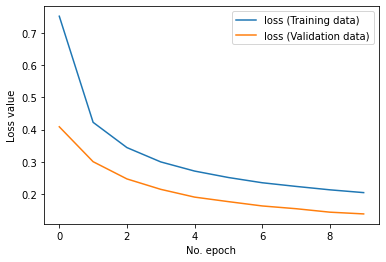

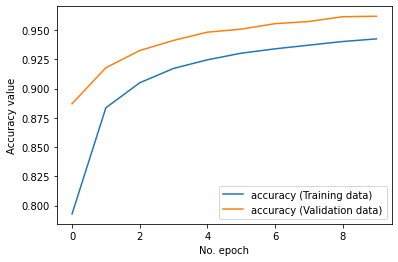

In [26]:
plt.plot(history.history['loss'], label='loss (Training data)')
plt.plot(history.history['val_loss'], label='loss (Validation data)')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="best")
plt.show()

plt.plot(history.history['accuracy'], label='accuracy (Training data)')
plt.plot(history.history['val_accuracy'], label='accuracy (Validation data)')
plt.ylabel('Accuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="best")
plt.show()


In [ ]:
print('For Train Data:')
y_pred_train=np.argmax(model.predict(x_train),axis=1)
print(metrics.classification_report(np.argmax(y_train,axis=1), y_pred_train, digits=3))

print('For Test Data:')
y_pred_test=np.argmax(model.predict(x_test),axis=1)
print(metrics.classification_report(np.argmax(y_test,axis=1), y_pred_test, digits=3))


For Train Data:


## Tanh

In [10]:
model=get_model(activation_function='tanh')
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 26)                3354      
Total params: 237,210
Trainable params: 237,210
Non-trainable params: 0
__________________________________________________

2022-06-18 17:24:41.555976: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [11]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), metrics=['accuracy'])
tic=time()
history=model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data = (x_test, y_test))
toc=time()

print('The total time to train the model was:',toc-tic)


2022-06-18 17:24:48.413876: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
9312/9312 [==============================] - 39s 4ms/step - loss: 1.1604 - accuracy: 0.6628 - val_loss: 0.6837 - val_accuracy: 0.8003
Epoch 2/10
9312/9312 [==============================] - 37s 4ms/step - loss: 0.8192 - accuracy: 0.7577 - val_loss: 0.5698 - val_accuracy: 0.8352
Epoch 3/10
9312/9312 [==============================] - 35s 4ms/step - loss: 0.7129 - accuracy: 0.7900 - val_loss: 0.5165 - val_accuracy: 0.8496
Epoch 4/10
9312/9312 [==============================] - 36s 4ms/step - loss: 0.6423 - accuracy: 0.8111 - val_loss: 0.4588 - val_accuracy: 0.8673
Epoch 5/10
9312/9312 [==============================] - 38s 4ms/step - loss: 0.5802 - accuracy: 0.8290 - val_loss: 0.4163 - val_accuracy: 0.8799
Epoch 6/10
9312/9312 [==============================] - 38s 4ms/step - loss: 0.5501 - accuracy: 0.8378 - val_loss: 0.3836 - val_accuracy: 0.8870
Epoch 7/10
9312/9312 [==============================] - 35s 4ms/step - loss: 0.5155 - accuracy: 0.8483 - val_loss: 0.3674 - val_ac

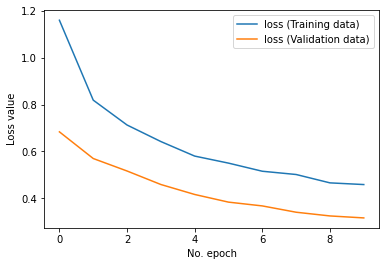

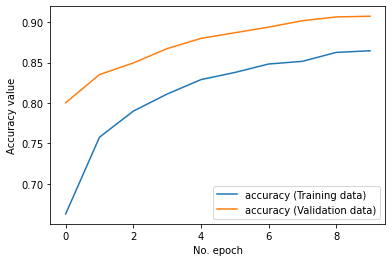

In [12]:
plt.plot(history.history['loss'], label='loss (Training data)')
plt.plot(history.history['val_loss'], label='loss (Validation data)')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="best")
plt.show()

plt.plot(history.history['accuracy'], label='accuracy (Training data)')
plt.plot(history.history['val_accuracy'], label='accuracy (Validation data)')
plt.ylabel('Accuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="best")
plt.show()


In [13]:
print('For Train Data:')
y_pred_train=np.argmax(model.predict(x_train),axis=1)
print(metrics.classification_report(np.argmax(y_train,axis=1), y_pred_train, digits=3))

print('For Test Data:')
y_pred_test=np.argmax(model.predict(x_test),axis=1)
print(metrics.classification_report(np.argmax(y_test,axis=1), y_pred_test, digits=3))


For Train Data:
              precision    recall  f1-score   support

           0      0.838     0.930     0.882     10978
           1      0.825     0.832     0.828      6937
           2      0.939     0.929     0.934     18780
           3      0.875     0.737     0.800      8145
           4      0.869     0.818     0.842      9230
           5      0.882     0.756     0.814       935
           6      0.885     0.764     0.820      4609
           7      0.814     0.741     0.776      5771
           8      0.906     0.768     0.831       883
           9      0.906     0.830     0.867      6696
          10      0.799     0.791     0.795      4498
          11      0.925     0.946     0.936      9186
          12      0.900     0.911     0.906      9923
          13      0.848     0.883     0.865     15144
          14      0.920     0.974     0.946     46298
          15      0.920     0.953     0.936     15464
          16      0.842     0.750     0.793      4679
          1

The developed neural network performs well on training and test data using the ReLU activation function.

# Optimizer


## Momentum = 0.5

In [14]:
model=get_model(activation_function='relu')
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 26)                3354      
Total params: 237,210
Trainable params: 237,210
Non-trainable params: 0
________________________________________________

In [15]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.5), metrics=['accuracy'])
tic=time()
history=model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data = (x_test, y_test))
toc=time()

print('The total time to train the model was:',toc-tic)


Epoch 1/10
9312/9312 [==============================] - 38s 4ms/step - loss: 281170.4375 - accuracy: 0.1547 - val_loss: 3.6227 - val_accuracy: 0.1547
Epoch 2/10
9312/9312 [==============================] - 36s 4ms/step - loss: 3.1988 - accuracy: 0.1554 - val_loss: 2.9315 - val_accuracy: 0.1547
Epoch 3/10
9312/9312 [==============================] - 36s 4ms/step - loss: 2.9284 - accuracy: 0.1554 - val_loss: 2.9313 - val_accuracy: 0.1547
Epoch 4/10
9312/9312 [==============================] - 39s 4ms/step - loss: 2.9283 - accuracy: 0.1554 - val_loss: 2.9313 - val_accuracy: 0.1547
Epoch 5/10
9312/9312 [==============================] - 38s 4ms/step - loss: 2.9282 - accuracy: 0.1554 - val_loss: 2.9311 - val_accuracy: 0.1547
Epoch 6/10
9312/9312 [==============================] - 36s 4ms/step - loss: 2.9282 - accuracy: 0.1554 - val_loss: 2.9314 - val_accuracy: 0.1547
Epoch 7/10
9312/9312 [==============================] - 36s 4ms/step - loss: 2.9282 - accuracy: 0.1554 - val_loss: 2.9314 - v

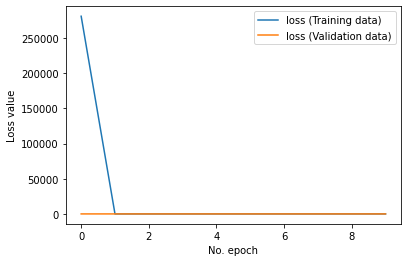

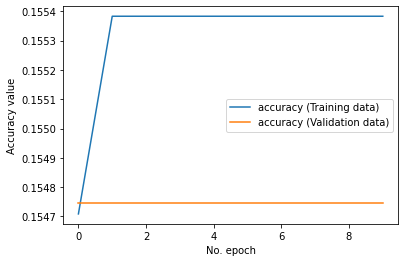

For Train Data:


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0      0.000     0.000     0.000     10978
           1      0.000     0.000     0.000      6937
           2      0.000     0.000     0.000     18780
           3      0.000     0.000     0.000      8145
           4      0.000     0.000     0.000      9230
           5      0.000     0.000     0.000       935
           6      0.000     0.000     0.000      4609
           7      0.000     0.000     0.000      5771
           8      0.000     0.000     0.000       883
           9      0.000     0.000     0.000      6696
          10      0.000     0.000     0.000      4498
          11      0.000     0.000     0.000      9186
          12      0.000     0.000     0.000      9923
          13      0.000     0.000     0.000     15144
          14      0.155     1.000     0.269     46298
          15      0.000     0.000     0.000     15464
          16      0.000     0.000     0.000      4679
          17      0.000    

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
plt.plot(history.history['loss'], label='loss (Training data)')
plt.plot(history.history['val_loss'], label='loss (Validation data)')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="best")
plt.show()

plt.plot(history.history['accuracy'], label='accuracy (Training data)')
plt.plot(history.history['val_accuracy'], label='accuracy (Validation data)')
plt.ylabel('Accuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="best")
plt.show()

print('For Train Data:')
y_pred_train=np.argmax(model.predict(x_train),axis=1)
print(metrics.classification_report(np.argmax(y_train,axis=1), y_pred_train, digits=3))

print('For Test Data:')
y_pred_test=np.argmax(model.predict(x_test),axis=1)
print(metrics.classification_report(np.argmax(y_test,axis=1), y_pred_test, digits=3))


## Momentum = 0.9

In [28]:
model=get_model(activation_function='relu')
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 26)                3354      
Total params: 237,210
Trainable params: 237,210
Non-trainable params: 0
________________________________________________

In [29]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.9), metrics=['accuracy'])
tic=time()
history=model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data = (x_test, y_test))
toc=time()

print('The total time to train the model was:',toc-tic)


2022-06-18 18:22:35.146338: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
9312/9312 [==============================] - 40s 4ms/step - loss: 30111803899904.0000 - accuracy: 0.1552 - val_loss: 2.9292 - val_accuracy: 0.1541
Epoch 2/10
9312/9312 [==============================] - 37s 4ms/step - loss: 2.9291 - accuracy: 0.1556 - val_loss: 2.9293 - val_accuracy: 0.1541
Epoch 3/10
9312/9312 [==============================] - 38s 4ms/step - loss: 2.9291 - accuracy: 0.1556 - val_loss: 2.9300 - val_accuracy: 0.1541
Epoch 4/10
9312/9312 [==============================] - 39s 4ms/step - loss: 2.9291 - accuracy: 0.1556 - val_loss: 2.9295 - val_accuracy: 0.1541
Epoch 5/10
9312/9312 [==============================] - 41s 4ms/step - loss: 2.9291 - accuracy: 0.1555 - val_loss: 2.9292 - val_accuracy: 0.1541
Epoch 6/10
9312/9312 [==============================] - 38s 4ms/step - loss: 2.9291 - accuracy: 0.1556 - val_loss: 2.9291 - val_accuracy: 0.1541
Epoch 7/10
9312/9312 [==============================] - 38s 4ms/step - loss: 2.9291 - accuracy: 0.1556 - val_loss: 2.

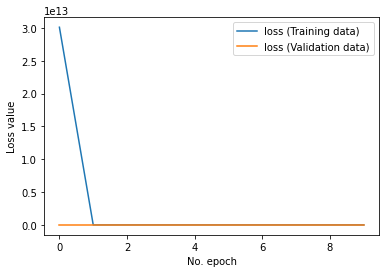

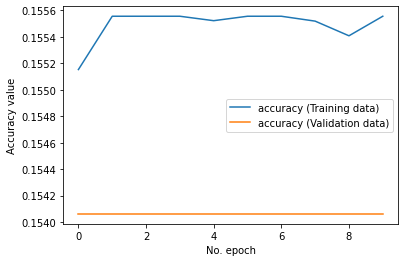

For Train Data:


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0      0.000     0.000     0.000     11103
           1      0.000     0.000     0.000      7004
           2      0.000     0.000     0.000     18642
           3      0.000     0.000     0.000      8096
           4      0.000     0.000     0.000      9191
           5      0.000     0.000     0.000       948
           6      0.000     0.000     0.000      4607
           7      0.000     0.000     0.000      5769
           8      0.000     0.000     0.000       912
           9      0.000     0.000     0.000      6809
          10      0.000     0.000     0.000      4483
          11      0.000     0.000     0.000      9211
          12      0.000     0.000     0.000      9891
          13      0.000     0.000     0.000     15246
          14      0.156     1.000     0.269     46349
          15      0.000     0.000     0.000     15481
          16      0.000     0.000     0.000      4634
          17      0.000    

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
plt.plot(history.history['loss'], label='loss (Training data)')
plt.plot(history.history['val_loss'], label='loss (Validation data)')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="best")
plt.show()

plt.plot(history.history['accuracy'], label='accuracy (Training data)')
plt.plot(history.history['val_accuracy'], label='accuracy (Validation data)')
plt.ylabel('Accuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="best")
plt.show()

print('For Train Data:')
y_pred_train=np.argmax(model.predict(x_train),axis=1)
print(metrics.classification_report(np.argmax(y_train,axis=1), y_pred_train, digits=3))

print('For Test Data:')
y_pred_test=np.argmax(model.predict(x_test),axis=1)
print(metrics.classification_report(np.argmax(y_test,axis=1), y_pred_test, digits=3))


## Momentum = 0.98

In [31]:
model=get_model(activation_function='relu')
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 26)                3354      
Total params: 237,210
Trainable params: 237,210
Non-trainable params: 0
________________________________________________

In [32]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.98), metrics=['accuracy'])
tic=time()
history=model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data = (x_test, y_test))
toc=time()

print('The total time to train the model was:',toc-tic)


Epoch 1/10
9312/9312 [==============================] - 45s 5ms/step - loss: 3143789.7500 - accuracy: 0.1531 - val_loss: 25.0086 - val_accuracy: 0.1541
Epoch 2/10
9312/9312 [==============================] - 43s 5ms/step - loss: 5.1883 - accuracy: 0.1543 - val_loss: 7.4481 - val_accuracy: 0.1541
Epoch 3/10
9312/9312 [==============================] - 41s 4ms/step - loss: 2.9321 - accuracy: 0.1539 - val_loss: 7.4476 - val_accuracy: 0.1541
Epoch 4/10
9312/9312 [==============================] - 37s 4ms/step - loss: 2.9323 - accuracy: 0.1538 - val_loss: 7.4478 - val_accuracy: 0.1541
Epoch 5/10
9312/9312 [==============================] - 39s 4ms/step - loss: 2.9320 - accuracy: 0.1543 - val_loss: 7.4480 - val_accuracy: 0.1297
Epoch 6/10
9312/9312 [==============================] - 38s 4ms/step - loss: 2.9320 - accuracy: 0.1539 - val_loss: 7.4464 - val_accuracy: 0.1541
Epoch 7/10
9312/9312 [==============================] - 39s 4ms/step - loss: 2.9321 - accuracy: 0.1544 - val_loss: 7.4459 -

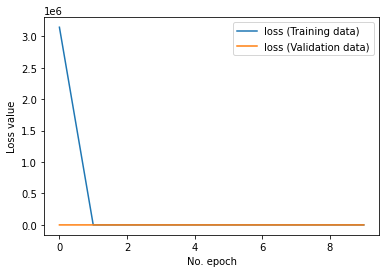

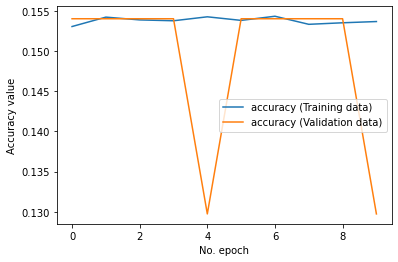

For Train Data:


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0      0.000     0.000     0.000     11103
           1      0.000     0.000     0.000      7004
           2      0.000     0.000     0.000     18642
           3      0.000     0.000     0.000      8096
           4      0.000     0.000     0.000      9191
           5      0.000     0.000     0.000       948
           6      0.000     0.000     0.000      4607
           7      0.000     0.000     0.000      5769
           8      0.000     0.000     0.000       912
           9      0.000     0.000     0.000      6809
          10      0.000     0.000     0.000      4483
          11      0.000     0.000     0.000      9211
          12      0.000     0.000     0.000      9891
          13      0.000     0.000     0.000     15246
          14      0.000     0.000     0.000     46349
          15      0.000     0.000     0.000     15481
          16      0.000     0.000     0.000      4634
          17      0.000    

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
plt.plot(history.history['loss'], label='loss (Training data)')
plt.plot(history.history['val_loss'], label='loss (Validation data)')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="best")
plt.show()

plt.plot(history.history['accuracy'], label='accuracy (Training data)')
plt.plot(history.history['val_accuracy'], label='accuracy (Validation data)')
plt.ylabel('Accuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="best")
plt.show()

print('For Train Data:')
y_pred_train=np.argmax(model.predict(x_train),axis=1)
print(metrics.classification_report(np.argmax(y_train,axis=1), y_pred_train, digits=3))

print('For Test Data:')
y_pred_test=np.argmax(model.predict(x_test),axis=1)
print(metrics.classification_report(np.argmax(y_test,axis=1), y_pred_test, digits=3))


## Adam

In [17]:
model=get_model(activation_function='relu')
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 26)                3354      
Total params: 237,210
Trainable params: 237,210
Non-trainable params: 0
__________________________________________________

2022-06-18 19:07:44.470038: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [18]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
tic=time()
history=model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data = (x_test, y_test))
toc=time()

print('The total time to train the model was:',toc-tic)


2022-06-18 19:07:49.343966: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
9312/9312 [==============================] - 46s 5ms/step - loss: 1.4546 - accuracy: 0.6709 - val_loss: 0.4076 - val_accuracy: 0.8851
Epoch 2/10
9312/9312 [==============================] - 45s 5ms/step - loss: 0.6042 - accuracy: 0.8361 - val_loss: 0.3498 - val_accuracy: 0.9064
Epoch 3/10
9312/9312 [==============================] - 46s 5ms/step - loss: 0.5362 - accuracy: 0.8601 - val_loss: 0.2838 - val_accuracy: 0.9248
Epoch 4/10
9312/9312 [==============================] - 46s 5ms/step - loss: 0.5167 - accuracy: 0.8682 - val_loss: 0.2900 - val_accuracy: 0.9283
Epoch 5/10
9312/9312 [==============================] - 46s 5ms/step - loss: 0.5046 - accuracy: 0.8740 - val_loss: 0.2906 - val_accuracy: 0.9260
Epoch 6/10
9312/9312 [==============================] - 46s 5ms/step - loss: 0.4983 - accuracy: 0.8766 - val_loss: 0.2679 - val_accuracy: 0.9306
Epoch 7/10
9312/9312 [==============================] - 47s 5ms/step - loss: 0.4971 - accuracy: 0.8798 - val_loss: 0.2958 - val_ac

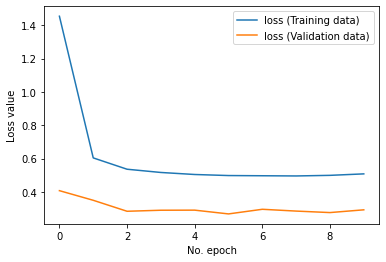

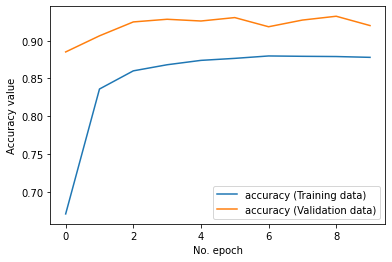

For Train Data:
              precision    recall  f1-score   support

           0      0.833     0.952     0.889     11049
           1      0.947     0.836     0.888      6864
           2      0.905     0.980     0.941     18673
           3      0.826     0.735     0.778      8175
           4      0.934     0.869     0.900      9180
           5      0.936     0.896     0.916       937
           6      0.871     0.866     0.869      4617
           7      0.935     0.743     0.828      5772
           8      0.970     0.727     0.831       898
           9      0.776     0.851     0.812      6874
          10      0.900     0.786     0.839      4521
          11      0.970     0.964     0.967      9249
          12      0.958     0.932     0.945      9856
          13      0.731     0.963     0.831     15222
          14      0.942     0.978     0.960     46311
          15      0.986     0.960     0.973     15511
          16      0.963     0.849     0.903      4730
          1

In [19]:
plt.plot(history.history['loss'], label='loss (Training data)')
plt.plot(history.history['val_loss'], label='loss (Validation data)')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="best")
plt.show()

plt.plot(history.history['accuracy'], label='accuracy (Training data)')
plt.plot(history.history['val_accuracy'], label='accuracy (Validation data)')
plt.ylabel('Accuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="best")
plt.show()

print('For Train Data:')
y_pred_train=np.argmax(model.predict(x_train),axis=1)
print(metrics.classification_report(np.argmax(y_train,axis=1), y_pred_train, digits=3))

print('For Test Data:')
y_pred_test=np.argmax(model.predict(x_test),axis=1)
print(metrics.classification_report(np.argmax(y_test,axis=1), y_pred_test, digits=3))


Momentum or SGD with momentum is a method that helps accelerate gradients vectors in the right directions, thus leading to faster converging. With Stochastic Gradient Descent, we don’t compute the exact derivate of our loss function. Instead, we’re estimating it on a small batch. This means we’re not always going in the optimal direction because our derivatives are noisy, just like in my graphs above. So, exponentially weighted averages can provide us with a better estimate closer to the actual derivate than our noisy calculations. This is one reason why momentum might work better than classic SGD.

Increasing the momentum is not always a good idea because instead of leading to faster convergence, it may cause to diverge from the optimal solution. Using the Adam Optimizer leads to better convergence than the SGD in most neural network architectures.

# Number of Epochs

In [21]:
model=get_model(activation_function='relu')
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 26)                3354      
Total params: 237,210
Trainable params: 237,210
Non-trainable params: 0
________________________________________________

In [22]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
tic=time()
history=model.fit(x_train, y_train, batch_size=32, epochs=20, validation_data = (x_test, y_test))
toc=time()

print('The total time to train the model was:',toc-tic)


Epoch 1/20
9312/9312 [==============================] - 49s 5ms/step - loss: 1.4470 - accuracy: 0.6835 - val_loss: 0.4033 - val_accuracy: 0.8873
Epoch 2/20
9312/9312 [==============================] - 48s 5ms/step - loss: 0.5778 - accuracy: 0.8459 - val_loss: 0.3126 - val_accuracy: 0.9150
Epoch 3/20
9312/9312 [==============================] - 47s 5ms/step - loss: 0.5241 - accuracy: 0.8650 - val_loss: 0.2928 - val_accuracy: 0.9247
Epoch 4/20
9312/9312 [==============================] - 48s 5ms/step - loss: 0.5051 - accuracy: 0.8727 - val_loss: 0.2781 - val_accuracy: 0.9284
Epoch 5/20
9312/9312 [==============================] - 47s 5ms/step - loss: 0.4931 - accuracy: 0.8773 - val_loss: 0.2853 - val_accuracy: 0.9270
Epoch 6/20
9312/9312 [==============================] - 49s 5ms/step - loss: 0.4854 - accuracy: 0.8797 - val_loss: 0.2895 - val_accuracy: 0.9248
Epoch 7/20
9312/9312 [==============================] - 49s 5ms/step - loss: 0.4857 - accuracy: 0.8823 - val_loss: 0.2678 - val_ac

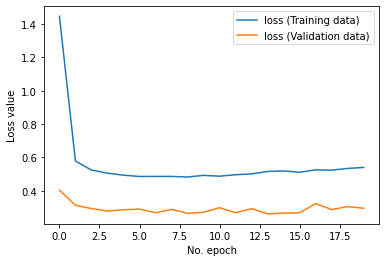

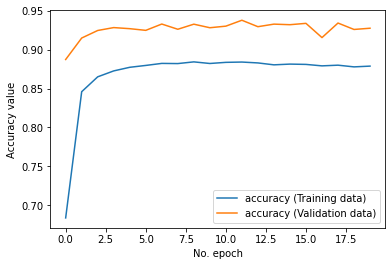

For Train Data:
              precision    recall  f1-score   support

           0      0.881     0.944     0.911     11049
           1      0.963     0.829     0.891      6864
           2      0.909     0.986     0.946     18673
           3      0.950     0.801     0.869      8175
           4      0.923     0.842     0.881      9180
           5      0.851     0.489     0.621       937
           6      0.980     0.812     0.888      4617
           7      0.987     0.624     0.764      5772
           8      0.974     0.671     0.795       898
           9      0.890     0.921     0.906      6874
          10      0.965     0.803     0.877      4521
          11      0.962     0.956     0.959      9249
          12      0.956     0.957     0.956      9856
          13      0.814     0.960     0.881     15222
          14      0.963     0.981     0.972     46311
          15      0.979     0.970     0.975     15511
          16      0.966     0.844     0.901      4730
          1

In [23]:
plt.plot(history.history['loss'], label='loss (Training data)')
plt.plot(history.history['val_loss'], label='loss (Validation data)')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="best")
plt.show()

plt.plot(history.history['accuracy'], label='accuracy (Training data)')
plt.plot(history.history['val_accuracy'], label='accuracy (Validation data)')
plt.ylabel('Accuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="best")
plt.show()

print('For Train Data:')
y_pred_train=np.argmax(model.predict(x_train),axis=1)
print(metrics.classification_report(np.argmax(y_train,axis=1), y_pred_train, digits=3))

print('For Test Data:')
y_pred_test=np.argmax(model.predict(x_test),axis=1)
print(metrics.classification_report(np.argmax(y_test,axis=1), y_pred_test, digits=3))


We need to train the learning algorithm in several epochs because the most common method for training in deep learning is a form of gradient descent. Each epoch finds the approximate direction that each parameter needs to be adjusted. Hence, the network must be trained for several epochs to reach the optimum solution.

On the other hand, training the network for a lot of epochs causes the model to overfit, the generalization ability of the network decreases, and the accuracy of the test data would be significant.

To overcome this problem, we should use cross-validation methods like evaluating the model on the test after each epoch and tracking the model's training process.

# Loss Function

In [10]:
model=get_model(activation_function='relu')
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 26)                3354      
Total params: 237,210
Trainable params: 237,210
Non-trainable params: 0
__________________________________________________

2022-06-18 19:39:50.869026: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [11]:
model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
tic=time()
history=model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data = (x_test, y_test))
toc=time()

print('The total time to train the model was:',toc-tic)


2022-06-18 19:39:56.656745: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
9312/9312 [==============================] - 38s 4ms/step - loss: 0.0724 - accuracy: 0.0591 - val_loss: 0.0722 - val_accuracy: 0.0609
Epoch 2/10
9312/9312 [==============================] - 37s 4ms/step - loss: 0.0723 - accuracy: 0.0603 - val_loss: 0.0722 - val_accuracy: 0.0609
Epoch 3/10
9312/9312 [==============================] - 37s 4ms/step - loss: 0.0723 - accuracy: 0.0603 - val_loss: 0.0722 - val_accuracy: 0.0609
Epoch 4/10
9312/9312 [==============================] - 37s 4ms/step - loss: 0.0723 - accuracy: 0.0603 - val_loss: 0.0722 - val_accuracy: 0.0609
Epoch 5/10
9312/9312 [==============================] - 37s 4ms/step - loss: 0.0723 - accuracy: 0.0603 - val_loss: 0.0722 - val_accuracy: 0.0609
Epoch 6/10
9312/9312 [==============================] - 37s 4ms/step - loss: 0.0723 - accuracy: 0.0603 - val_loss: 0.0722 - val_accuracy: 0.0609
Epoch 7/10
9312/9312 [==============================] - 36s 4ms/step - loss: 0.0723 - accuracy: 0.0603 - val_loss: 0.0722 - val_ac

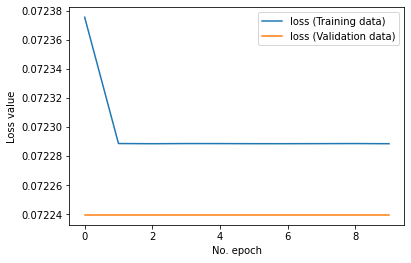

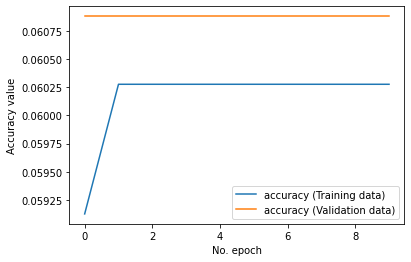

For Train Data:


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0      0.000     0.000     0.000     11149
           1      0.000     0.000     0.000      6925
           2      0.000     0.000     0.000     18789
           3      0.000     0.000     0.000      8171
           4      0.000     0.000     0.000      9158
           5      0.000     0.000     0.000       920
           6      0.000     0.000     0.000      4586
           7      0.000     0.000     0.000      5782
           8      0.000     0.000     0.000       899
           9      0.000     0.000     0.000      6803
          10      0.000     0.000     0.000      4514
          11      0.000     0.000     0.000      9283
          12      0.000     0.000     0.000      9821
          13      0.000     0.000     0.000     15121
          14      0.000     0.000     0.000     46104
          15      0.000     0.000     0.000     15447
          16      0.000     0.000     0.000      4701
          17      0.000    

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
plt.plot(history.history['loss'], label='loss (Training data)')
plt.plot(history.history['val_loss'], label='loss (Validation data)')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="best")
plt.show()

plt.plot(history.history['accuracy'], label='accuracy (Training data)')
plt.plot(history.history['val_accuracy'], label='accuracy (Validation data)')
plt.ylabel('Accuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="best")
plt.show()

print('For Train Data:')
y_pred_train=np.argmax(model.predict(x_train),axis=1)
print(metrics.classification_report(np.argmax(y_train,axis=1), y_pred_train, digits=3))

print('For Test Data:')
y_pred_test=np.argmax(model.predict(x_test),axis=1)
print(metrics.classification_report(np.argmax(y_test,axis=1), y_pred_test, digits=3))


There are two reasons why Mean Squared Error(MSE) is a bad choice for binary classification problems:

First, using MSE means we assume that the underlying data has been generated from a normal distribution (a bell-shaped curve). In Bayesian terms, this means we take a Gaussian prior. While in reality, a dataset that can be classified into two or more categories is not from a normal distribution but a Bernoulli distribution.
Secondly, the MSE function is non-convex for classification problems. In simple terms, if a classification model is trained with the MSE loss function, it is not guaranteed to minimize the loss function. This is because the MSE loss function expects real-valued inputs in range (-∞, ∞), while classification models output probabilities in range(0,1) through the sigmoid or softmax function.

Using MSE as the loss function decreases the model's accuracy on the training and the test data because it is not a good metric for classification problems. MSE is a better metric for regression problems.

# Regularization

## L2 Regularization

In [13]:
def get_model(activation_function='relu'):
    regularizer_parameter=0.0001
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape = (28*28, 1)))
    model.add(tf.keras.layers.Dense(256, activation=activation_function,kernel_regularizer=tf.keras.regularizers.l2(regularizer_parameter)))
    model.add(tf.keras.layers.Dense(128, activation=activation_function,kernel_regularizer=tf.keras.regularizers.l2(regularizer_parameter)))
    model.add(tf.keras.layers.Dense(len(labels), activation='softmax'))
    return model


In [14]:
model=get_model(activation_function='relu')
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 26)                3354      
Total params: 237,210
Trainable params: 237,210
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
tic=time()
history=model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data = (x_test, y_test))
toc=time()

print('The total time to train the model was:',toc-tic)


Epoch 1/10
9312/9312 [==============================] - 41s 4ms/step - loss: 0.8182 - accuracy: 0.8486 - val_loss: 0.3531 - val_accuracy: 0.9193
Epoch 2/10
9312/9312 [==============================] - 38s 4ms/step - loss: 0.3161 - accuracy: 0.9309 - val_loss: 0.3134 - val_accuracy: 0.9309
Epoch 3/10
9312/9312 [==============================] - 38s 4ms/step - loss: 0.2907 - accuracy: 0.9416 - val_loss: 0.2705 - val_accuracy: 0.9480
Epoch 4/10
9312/9312 [==============================] - 38s 4ms/step - loss: 0.2837 - accuracy: 0.9454 - val_loss: 0.2751 - val_accuracy: 0.9477
Epoch 5/10
9312/9312 [==============================] - 39s 4ms/step - loss: 0.2779 - accuracy: 0.9477 - val_loss: 0.3003 - val_accuracy: 0.9448
Epoch 6/10
9312/9312 [==============================] - 41s 4ms/step - loss: 0.2754 - accuracy: 0.9501 - val_loss: 0.2642 - val_accuracy: 0.9515
Epoch 7/10
9312/9312 [==============================] - 41s 4ms/step - loss: 0.2778 - accuracy: 0.9496 - val_loss: 0.2645 - val_ac

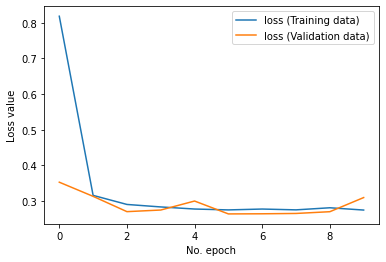

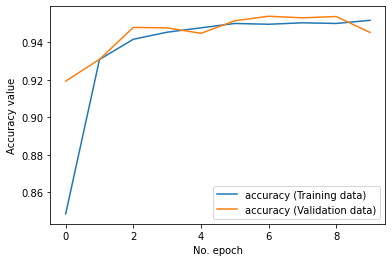

For Train Data:
              precision    recall  f1-score   support

           0      0.909     0.973     0.940     11149
           1      0.948     0.887     0.916      6925
           2      0.984     0.941     0.962     18789
           3      0.913     0.908     0.910      8171
           4      0.911     0.936     0.923      9158
           5      0.854     0.966     0.907       920
           6      0.882     0.881     0.881      4586
           7      0.943     0.863     0.901      5782
           8      0.906     0.776     0.836       899
           9      0.965     0.814     0.883      6803
          10      0.854     0.949     0.899      4514
          11      0.933     0.982     0.957      9283
          12      0.941     0.973     0.957      9821
          13      0.937     0.950     0.943     15121
          14      0.977     0.979     0.978     46104
          15      0.946     0.978     0.962     15447
          16      0.881     0.779     0.827      4701
          1

In [16]:
plt.plot(history.history['loss'], label='loss (Training data)')
plt.plot(history.history['val_loss'], label='loss (Validation data)')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="best")
plt.show()

plt.plot(history.history['accuracy'], label='accuracy (Training data)')
plt.plot(history.history['val_accuracy'], label='accuracy (Validation data)')
plt.ylabel('Accuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="best")
plt.show()

print('For Train Data:')
y_pred_train=np.argmax(model.predict(x_train),axis=1)
print(metrics.classification_report(np.argmax(y_train,axis=1), y_pred_train, digits=3))

print('For Test Data:')
y_pred_test=np.argmax(model.predict(x_test),axis=1)
print(metrics.classification_report(np.argmax(y_test,axis=1), y_pred_test, digits=3))


## Dropout

In [8]:
def get_model(activation_function='relu'):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape = (28*28, 1)))
    model.add(tf.keras.layers.Dense(256, activation=activation_function))
    model.add(tf.keras.layers.Dropout(0.1))
    model.add(tf.keras.layers.Dense(128, activation=activation_function))
    model.add(tf.keras.layers.Dropout(0.1))
    model.add(tf.keras.layers.Dense(len(labels), activation='softmax'))
    return model


In [9]:
model=get_model(activation_function='relu')
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 26)                3354      
Total params: 237,210
Trainable params: 237,210
Non-trainable params: 0
__________________________________________________

2022-06-18 20:00:38.414730: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [10]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
tic=time()
history=model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data = (x_test, y_test))
toc=time()

print('The total time to train the model was:',toc-tic)


2022-06-18 20:00:46.493640: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
9312/9312 [==============================] - 49s 5ms/step - loss: 1.1618 - accuracy: 0.7312 - val_loss: 0.3629 - val_accuracy: 0.8987
Epoch 2/10
9312/9312 [==============================] - 52s 6ms/step - loss: 0.4641 - accuracy: 0.8742 - val_loss: 0.2894 - val_accuracy: 0.9208
Epoch 3/10
9312/9312 [==============================] - 44s 5ms/step - loss: 0.3988 - accuracy: 0.8965 - val_loss: 0.2624 - val_accuracy: 0.9311
Epoch 4/10
9312/9312 [==============================] - 37s 4ms/step - loss: 0.3844 - accuracy: 0.9030 - val_loss: 0.2493 - val_accuracy: 0.9360
Epoch 5/10
9312/9312 [==============================] - 39s 4ms/step - loss: 0.3685 - accuracy: 0.9077 - val_loss: 0.2447 - val_accuracy: 0.9411
Epoch 6/10
9312/9312 [==============================] - 41s 4ms/step - loss: 0.3659 - accuracy: 0.9098 - val_loss: 0.2335 - val_accuracy: 0.9436
Epoch 7/10
9312/9312 [==============================] - 39s 4ms/step - loss: 0.3662 - accuracy: 0.9107 - val_loss: 0.2506 - val_ac

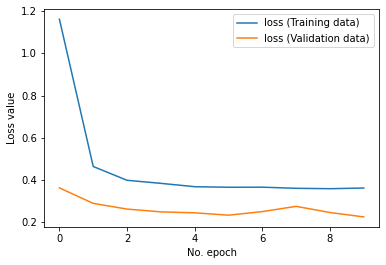

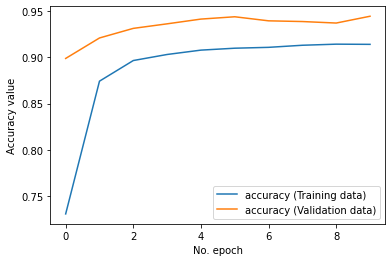

For Train Data:
              precision    recall  f1-score   support

           0      0.926     0.929     0.928     11120
           1      0.915     0.897     0.906      6964
           2      0.957     0.976     0.967     18640
           3      0.859     0.924     0.890      8062
           4      0.950     0.894     0.921      9030
           5      0.890     0.949     0.919       945
           6      0.971     0.867     0.916      4616
           7      0.900     0.823     0.860      5750
           8      0.911     0.854     0.882       900
           9      0.936     0.930     0.933      6804
          10      0.934     0.831     0.879      4461
          11      0.966     0.966     0.966      9325
          12      0.989     0.900     0.942      9844
          13      0.803     0.974     0.881     15173
          14      0.975     0.981     0.978     46202
          15      0.972     0.976     0.974     15465
          16      0.937     0.887     0.911      4692
          1

In [11]:
plt.plot(history.history['loss'], label='loss (Training data)')
plt.plot(history.history['val_loss'], label='loss (Validation data)')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="best")
plt.show()

plt.plot(history.history['accuracy'], label='accuracy (Training data)')
plt.plot(history.history['val_accuracy'], label='accuracy (Validation data)')
plt.ylabel('Accuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="best")
plt.show()

print('For Train Data:')
y_pred_train=np.argmax(model.predict(x_train),axis=1)
print(metrics.classification_report(np.argmax(y_train,axis=1), y_pred_train, digits=3))

print('For Test Data:')
y_pred_test=np.argmax(model.predict(x_test),axis=1)
print(metrics.classification_report(np.argmax(y_test,axis=1), y_pred_test, digits=3))


Regularizers allow us to apply penalties on layer parameters or layer activity during optimization. L2 regularization adds an L2 penalty equal to the square of the magnitude of coefficients. L2 will not yield sparse models, and all coefficients are shrunk by the same factor (none are eliminated).

In the dropout method, during training, some number of layer outputs are randomly ignored or dropped out. This makes the layer have a different number of neurons over the training process and prevents overfitting.